In [2]:
import torch

In [3]:
model_new = torch.load('./entire_model_2020-01-20_02-18-26.pth')

/home/adri/anaconda3/envs/python3.6/lib/python3.6/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'unet.Unet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [4]:
import pickle as pkl
with open('./activations-5th-training/activations-0-X.pkl', 'rb') as pickle_file:
    X = pkl.load(pickle_file)
with open('./activations-5th-training/activations-0-Y.pkl', 'rb') as pickle_file:
    Y = pkl.load(pickle_file)    
with open('./activations-5th-training/activations-0-Y_hat.pkl', 'rb') as pickle_file:
    Y_hat = pkl.load(pickle_file)    

In [5]:
import numpy as np
print(np.shape(X))
print(np.shape(Y))
print(np.shape(Y_hat))

(11, 1, 348, 348)
(11, 1, 348, 348)
(11, 164, 164)


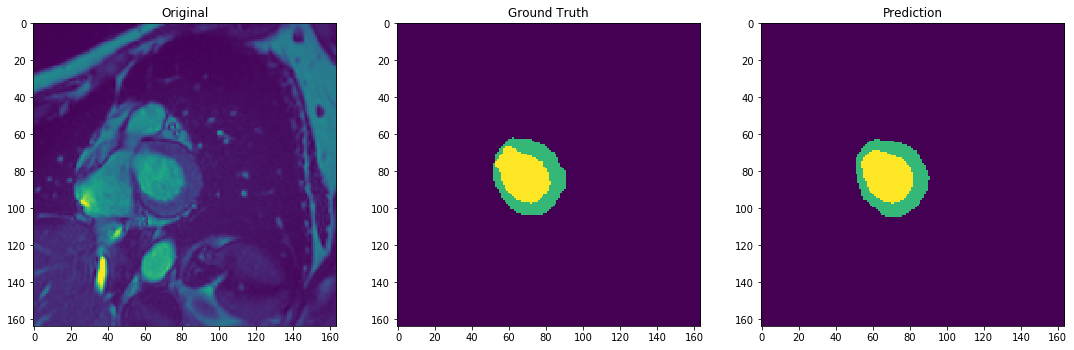

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,17))
plt.subplot(1,4,1)
plt.imshow(X[0][0].reshape(348,348)[92:-92,92:-92])
plt.title("Original")
plt.subplot(1,4,2)
plt.imshow(Y[0][0].reshape(348,348)[92:-92,92:-92])
plt.title("Ground Truth")
plt.subplot(1,4,3)
plt.imshow(Y_hat[0])
plt.title("Prediction")
plt.show()

In [21]:
import pandas as pd
df = pd.read_csv("activations-5th-training/activations-H.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,2.872676,0.234945,0.989540,5.736715,0.562322,0.401306,7.961180,4.769307,4.694004,2.816379,...,3.506495,0.030836,0.0,1.128560,7.302002,5.202969,3.616832,0.600062,1.690294,1.680545
1,3.040427,0.814077,1.023726,5.708339,0.831906,0.286262,8.469304,2.834385,8.129847,4.161116,...,2.362216,0.131660,0.0,1.212850,5.918733,4.878551,4.488846,2.443864,2.142240,2.256530
2,2.813602,0.145770,0.982724,5.447840,0.664330,0.501839,9.698709,5.061543,4.669390,2.931387,...,5.051203,0.000000,0.0,0.914415,7.306948,5.114201,6.598427,0.585833,2.564648,1.750519
3,2.252733,0.498229,1.214573,4.880998,0.827600,0.545152,9.045748,5.341161,6.917765,3.817987,...,3.424136,0.090498,0.0,1.025784,6.904840,3.667108,5.040344,1.561733,2.782025,1.763894
4,2.514433,1.036855,1.424784,5.723772,0.959672,0.474577,7.404051,4.761294,9.448566,6.137734,...,1.883603,0.165583,0.0,1.021938,6.988164,4.762637,6.160403,2.804051,3.069894,2.478149


In [38]:
import csv
import numpy as np
import os
from sklearn.decomposition import IncrementalPCA
import pickle as pkl

#"activations/activations-1-H.csv"

root = './activations/'
ipca = IncrementalPCA(n_components=2, batch_size=3)
fls = [x for x in os.listdir(root) if x.endswith('.csv')]
for i,fname in enumerate(fls):
    with open(root+fname) as csv:
        x = csv.read()
        
    dd = [float(v)  for c in x.split(',') for v in  c.split('\n') if v]        
    activations = np.array(dd).reshape((int(np.shape(dd)[0]/512),512))
    ipca.partial_fit(activations)

    
for i,fname in enumerate(os.listdir(root)):
    with open(root+fname) as csv:
        x = csv.read()
        
    dd = [float(v)  for c in x.split(',') for v in  c.split('\n') if v]        
    activations = np.array(dd).reshape((int(np.shape(dd)[0]/512),512))
    transformed = ipca.transform(activations) # saved transformed activations
    outfile = fname.split('.')[0] + "_transformed"
    np.save(outfile, transformed)

In [39]:
# save the model to disk
filename = 'ipca_model.sav'
pkl.dump(ipca, open(filename, 'wb'))

In [40]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb'))

In [41]:
loaded_model.explained_variance_

array([168.42694888, 112.66612343])

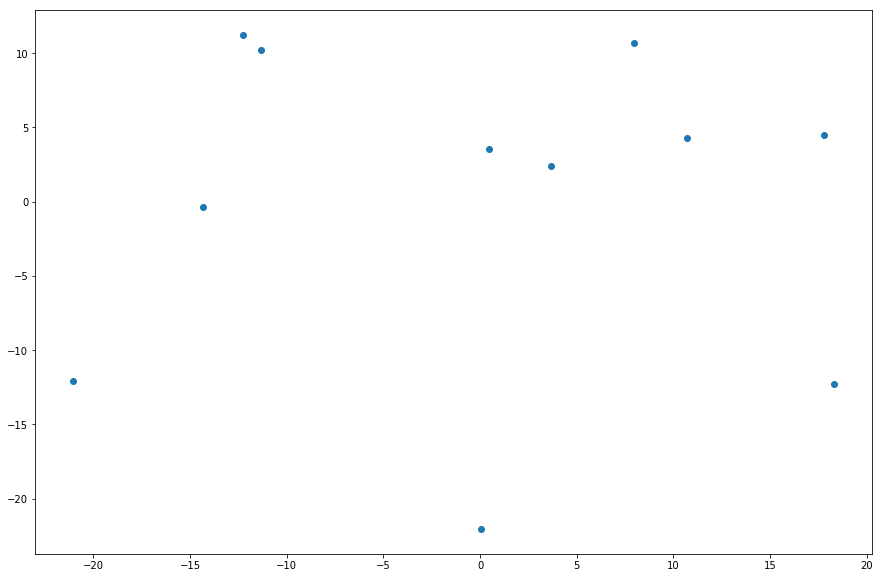

In [42]:
import matplotlib.pyplot as plt

x = np.load("./"+outfile+".npy")

plt.figure(figsize=(15,10))
plt.scatter(x[:,0], x[:,1])
plt.show()

## Superpixels - SLIC

### Simple linear case

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


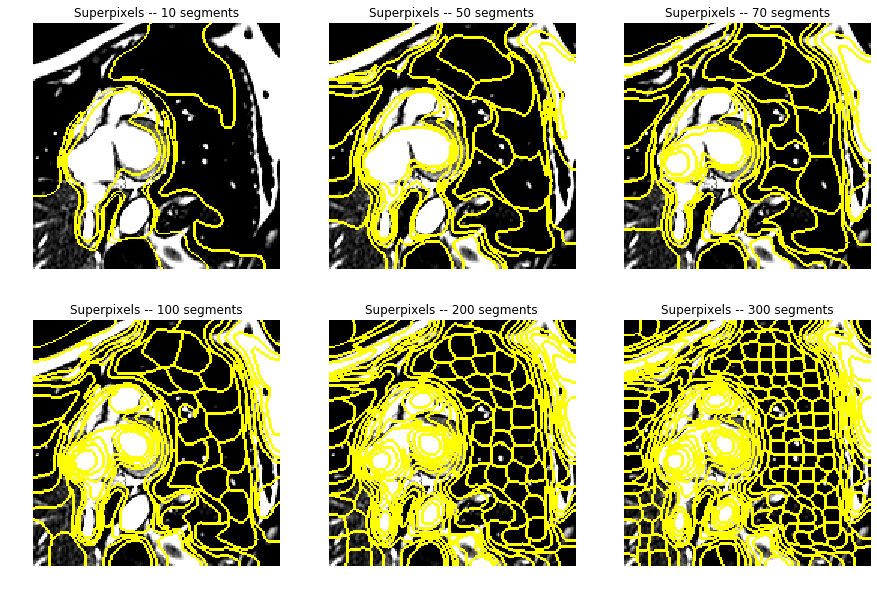

In [96]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

#image = img_as_float(plt.imread('../images/4chamber-view-hidden-atria.png'))
# load the image and convert it to a floating point data type
image = img_as_float(X[0][0].reshape(348,348)[92:-92,92:-92])
 
# loop over the number of segments
fig = plt.figure(figsize=(15,10))
for i, numSegments in enumerate((10, 50, 70, 100, 200, 300)):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, compactness=0.1, n_segments = numSegments, sigma = 5)

    # show the output of SLIC

    plt.subplot(2,3, i+1)
    plt.imshow(mark_boundaries(image, segments))
    plt.title("Superpixels -- %d segments" % (numSegments))
    plt.axis("off")

# show the plots
plt.show()

### \*\*\*IDEA\*\*\*
##### Some idea - how about trying to classify different images according to the view it was taken of or the number of slice it represents? Maybe this way we can predict the phase of the heart cycle?

### Steps to apply DTCAV to cardiac MRI

- train the network +
- create discovery dataset from were concept extraction will occur
- create superpixels from discovery dataset
- resize superpixels
- collect activations from running superpixels through the network
- cluster superpixels in the latent space with outliers removal
- mark clusters as concepts
- run TCAV on output classes and concepts

### Proposed steps

- train the network +
- collect activations from feeding network with training data +
- run incremental PCA over the collected activations
- cluster latent space